# Raw Extraction of required data 

Note that the raw extraction of required data takes a very long time, the import of pre-computed values is avaliable at the Plotting Code section.

In [1]:
import pandas as pd
import numpy as np
import tqdm
import csv
from datetime import datetime

In [2]:
# Defining the list indexes
indexes = {
    'Malware':0,
    'Phishing':1,
    'Exploits':2,
    'Fraudlent Services':3,
    'Unwanted Programs':4,
    'Spammers':5,
    'Unlabelled':6,
}

attack_map = ['Malware', 'Phishing', 'Exploits', 'Fraudlent Services',
            'Unwanted Programs', 'Spammers', 'Unlabelled']

In [3]:
# Convert date fields back into a python date object
date_calculation_cache = {}
def make_date(day, month, year):
    date = '%s-%s-%s' % (day, month, year)
    # Check cache before recomputation
    if date not in date_calculation_cache:
        iso_cal = datetime.strptime(date, "%d-%m-%Y").isocalendar()
        date_calculation_cache[date] = iso_cal
    else:
        iso_cal = date_calculation_cache[date]
    return iso_cal

In [4]:
ip_attacks = {attk: {} for attk in indexes}
ip_attacks['Labelled'] = {}

for attack in indexes:
    print(attack)
    files = []
    if attack == 'Unlabelled':
        # There are 23 files containing Unlabelled reports
        for i in range(23):
            files.append(('./../Datastore/%s_reports_%s.csv'%(attack,i), attack, i))
    else:
        files.append(('./../Datastore/%s_reports.csv'%attack, attack, None))
    #########################
    
    # Process the files
    for file_name, a, file_num in files:
        print(file_name)
        with open(file_name) as data_file:
            filereader = csv.reader(data_file)
            if attack == 'Unlabelled':
                activity_relabel = pd.read_csv('./../Unlabelled_predictions/%s_predictions_%s.csv'%(a, file_num),
                                               index_col=[0], header=None)
                activity_relabel = activity_relabel.transpose().values[0]
            for n, report in enumerate(tqdm.tqdm(filereader)):
                try:
                    # Unpack Row information
                    splits = report[0:9]

                    day = splits[5]
                    month = splits[6]
                    year = splits[7]
                    datasource = splits[8]        
                    org = splits[3]
                    asn = splits[2]
                    cc = splits[1]
                    ip = splits[0]
                    
                    # Compute week bins
                    iso_cal = make_date(day, month, year)
                    year_num, week_num, weekday_num = iso_cal

                    # Invalid Timestamp, likely 0.
                    if year_num == 1970:
                        continue
                    week = (year_num-1970)*52 + week_num

                except Exception, e: 
                    print(str(e))

                if ip is None or ip == '':
                    print("Skipping invalid IP: %s" % ip)
                    continue

                # Relabelling unlabelled reports
                if (attack == 'Unlabelled'):
                    attack_label = attack_map[activity_relabel[n]]
                else:
                    attack_label = attack

                # Selected key 'i' for scrutiny
                i = week
                if i not in ip_attacks[attack_label]:
                    ip_attacks[attack_label][i] = {}
                # Initialise the ip holder for the key
                if ip not in ip_attacks[attack_label][i]:
                    ip_attacks[attack_label][i][ip] = 0
                # Increment the attack, key, ip value
                ip_attacks[attack_label][i][ip] += 1

                # We maintain a distinct class for Labelled Data
                if attack_label != 'Unlabelled':
                    if i not in ip_attacks['Labelled']:
                        ip_attacks['Labelled'][i] = {}
                    # Initialise the ip holder for the key
                    if ip not in ip_attacks['Labelled'][i]:
                        ip_attacks['Labelled'][i][ip] = 0
                    # Increment the attack, key, ip value
                    ip_attacks['Labelled'][i][ip] += 1

print('Finished')

6918it [00:00, 52139.29it/s]
0it [00:00, ?it/s]

Spammers
./../Datastore/Spammers_reports.csv
Malware
./../Datastore/Malware_reports.csv


3190529it [00:26, 122188.26it/s]
12710it [00:00, 127025.01it/s]

Exploits
./../Datastore/Exploits_reports.csv


201108it [00:01, 130070.08it/s]
12505it [00:00, 125013.76it/s]

Phishing
./../Datastore/Phishing_reports.csv


2382889it [00:18, 127355.06it/s]
12264it [00:00, 122598.32it/s]

Fraudlent Services
./../Datastore/Fraudlent Services_reports.csv


829301it [00:06, 124625.43it/s]
10978it [00:00, 109728.57it/s]

Unwanted Programs
./../Datastore/Unwanted Programs_reports.csv


698700it [00:07, 98827.73it/s] 


Unlabelled
./../Datastore/Unlabelled_reports_0.csv


/Users/zha197/.local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
2000138it [00:33, 60177.79it/s]


./../Datastore/Unlabelled_reports_1.csv


2000007it [00:24, 82936.73it/s]


./../Datastore/Unlabelled_reports_2.csv


2000047it [00:15, 126879.06it/s]


./../Datastore/Unlabelled_reports_3.csv


2000022it [00:17, 113654.79it/s]


./../Datastore/Unlabelled_reports_4.csv


2000471it [00:18, 106108.17it/s]


./../Datastore/Unlabelled_reports_5.csv


2000567it [00:18, 109510.44it/s]


./../Datastore/Unlabelled_reports_6.csv


2000130it [00:20, 97282.94it/s]


./../Datastore/Unlabelled_reports_7.csv


2000541it [00:22, 88406.74it/s]


./../Datastore/Unlabelled_reports_8.csv


2000282it [00:18, 110824.66it/s]


./../Datastore/Unlabelled_reports_9.csv


2000016it [00:17, 111658.92it/s]


./../Datastore/Unlabelled_reports_10.csv


2000165it [00:16, 120075.73it/s]


./../Datastore/Unlabelled_reports_11.csv


2000021it [00:17, 115932.60it/s]


./../Datastore/Unlabelled_reports_12.csv


2000114it [00:19, 103667.75it/s]


./../Datastore/Unlabelled_reports_13.csv


2000038it [00:17, 112059.50it/s]


./../Datastore/Unlabelled_reports_14.csv


2000304it [00:19, 101605.78it/s]


./../Datastore/Unlabelled_reports_15.csv


2000019it [00:25, 79116.65it/s]


./../Datastore/Unlabelled_reports_16.csv


2000455it [00:17, 112133.15it/s]


./../Datastore/Unlabelled_reports_17.csv


2000040it [00:17, 115809.28it/s]


./../Datastore/Unlabelled_reports_18.csv


2000023it [00:17, 112469.01it/s]


./../Datastore/Unlabelled_reports_19.csv


2000058it [00:16, 117823.72it/s]


./../Datastore/Unlabelled_reports_20.csv


2000016it [00:16, 120949.49it/s]


./../Datastore/Unlabelled_reports_21.csv


2000294it [00:16, 118780.96it/s]
0it [00:00, ?it/s]

./../Datastore/Unlabelled_reports_22.csv


332782it [00:02, 121982.53it/s]

Finished


In [6]:
df = {}
# Turn the dictionary of dictionaries into dictionaries of DataFrames
for attack in ip_attacks:
    df[attack] = pd.DataFrame(ip_attacks[attack])
    df[attack].fillna(0, inplace=True)

In [7]:
# Transpose the dataframe, such that the weeks are on the index.
for attack in ip_attacks:
    df[attack] = df[attack].transpose()

In [8]:
# Our temporal analysis does not consider the remaining Unlabelled reports
del df['Unlabelled']

# Churn Model Fitting

In [9]:
new_df = df

# The array should be a sparse array, with sequentially increasing
# time bins, each containing the number of reports for a host.
def compute_lifetimes(arr):
    # To maintain time of each mal-activity campaign
    results = {'Death': [],'Life': []}
    # To maintain number of reports of each mal-activity campaign
    s_results = {'Death': [],'Life': []}
    # Start all hosts in a death state
    curr_track = 'Death'
    # Current life or death week tracking
    track_time = 0
    track_severity = 0
    for time_dur in arr:
        if time_dur > 0:
            if curr_track == 'Life':
                track_time += 1
                track_severity += time_dur
            else:
                results[curr_track].append(track_time)
                s_results[curr_track].append(track_severity)
                track_time = 1
                track_severity = time_dur
                curr_track = 'Life'

        else:
            if curr_track == 'Death':
                track_time += 1
                track_severity += time_dur
            else:
                results[curr_track].append(track_time)
                s_results[curr_track].append(track_severity)
                track_time = 1
                track_severity= time_dur
                curr_track = 'Death'
                
    results[curr_track].append(track_time)
    s_results[curr_track].append(track_severity)
                
    if len(results['Life']) == 0:
        return None
    
    assert len(results['Life']) == len(s_results['Life'])
    
    return (np.mean(results['Life']), np.mean(results['Death']),
            np.mean(s_results['Life']), np.mean(s_results['Death']),
            np.mean(np.divide(s_results['Life'], results['Life'])),
            len(results['Life']), len(results['Death'])
           )
res_arr = {}

In [10]:
# Compute lifetime statistice for every host
res_arr = {}
for attack in new_df:
    print(attack)
    res_arr[attack] = {}
    for col in new_df[attack]:

        res = compute_lifetimes(new_df[attack][col])

        if res is not None:
            res_arr[attack][col] = res

print('Finished')

Spammers
Malware
Exploits
Phishing
Fraudlent Services
Unwanted Programs
Labelled
Finished


In [13]:
life_death_recipr_df_holder = {}
for attack in new_df:
    life_death_df = pd.DataFrame(res_arr[attack])

    life_death_df.index = ['Life', 'Death', 'Life_S', 'Death_S',
                           'Severity', 'n_Life', 'n_Death']
    
    recipricol_mean_duration = {}
    for ip in life_death_df:
        l, d, l_s, d_s, s, n_l, n_d = life_death_df[ip]
        recipricol_mean_duration[ip] = 1/(l+d)
        
    life_death_recipr_df = life_death_df.append(
                pd.DataFrame(recipricol_mean_duration, index=[0]))

    life_death_recipr_df.index = ['Life', 'Death', 'Life_S', 'Death_S',
                                  'Severity', 'Number of Lives',
                                  'Number of Deaths',
                                  'Reciprocal Mean Duration']

    life_death_recipr_df_holder[attack] = life_death_recipr_df

In [14]:
"Finished"

'Finished'

In [15]:
# Drop Invalid entries
for attk in life_death_recipr_df_holder:
    life_death_recipr_df_holder[attk].drop('', axis=1, inplace=True,
                                           errors='ignore')
    life_death_recipr_df_holder[attk].drop('-1', axis=1, inplace=True,
                                           errors='ignore')
    life_death_recipr_df_holder[attk].drop('unknown', axis=1, inplace=True,
                                           errors='ignore')

In [16]:
# If carrying through to next section
# weekly_life_death_severity_reciprical
week_l_d_s_r = life_death_recipr_df_holder

In [17]:
print("Saving Statistics in:")
for attack, values in life_death_recipr_df_holder.items():
    out_file_name = "./ip_churn_stats/%s_weekly_churn_IP.csv" % attack
    print(out_file_name)
    values.to_csv(out_file_name, header=True, index=True, encoding='utf-8')
print("Finished")

Saving Statistics in:
./ip_churn_stats/Spammers_weekly_churn_IP.csv
./ip_churn_stats/Malware_weekly_churn_IP.csv
./ip_churn_stats/Exploits_weekly_churn_IP.csv
./ip_churn_stats/Phishing_weekly_churn_IP.csv
./ip_churn_stats/Fraudlent Services_weekly_churn_IP.csv
./ip_churn_stats/Unwanted Programs_weekly_churn_IP.csv
./ip_churn_stats/Labelled_weekly_churn_IP.csv
Finished


# Plotting Code

## Import previously computed statistics

In [ ]:
print("Loading Statistics from:")
week_l_d_s_r = {}
for attack in ['Spammers', 'Malware', 'Exploits', 'Phishing',
               'Fraudlent Services', 'Unwanted Programs', 'Labelled']:
    in_file_name = "./ip_churn_stats/%s_weekly_churn_IP.csv" % attack
    print(in_file_name)
    week_l_d_s_r[attack] = pd.read_csv(in_file_name, index_col=[0])
print("Finished")

## CDF graphing function

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def cdf(data, m, n, s, lstring, ax=None):
    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins,
                                     density=False)
    counts = counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    
    if ax is None:
        ax = plt.gca()
    
    # Plot the cdf
    lines = ax.plot(bin_edges[0:-1], cdf, linestyle='%s'%n,
                    color='%s'%m, marker='%s'%s,
                    markevery=0.1, label=lstring)    
    plt.ylim((0, 1))

    return lines


## Lifetime Plot

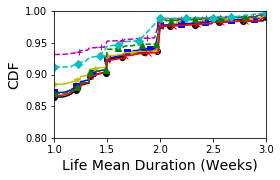

In [43]:
plt.figure(figsize=(4, 2.6))

stat = 'Life'
cdf(week_l_d_s_r['Labelled'].transpose()[stat].values.tolist(),
    'k', '-', 'o', "Total")
cdf(week_l_d_s_r['Unwanted Programs'].transpose()[stat].values.tolist(),
    'b', '-', 's', "PUP")
cdf(week_l_d_s_r['Fraudlent Services'].transpose()[stat].values.tolist(),
    'y', '-', '*', "Fruad. Serv.")
cdf(week_l_d_s_r['Malware'].transpose()[stat].values.tolist(),
    'r', '-', 'x', "Malware")
cdf(week_l_d_s_r['Exploits'].transpose()[stat].values.tolist(),
    'm', '--', '+', "Exploits")
cdf(week_l_d_s_r['Phishing'].transpose()[stat].values.tolist(),
    'g', '--', '^', "Phishing")
cdf(week_l_d_s_r['Spammers'].transpose()[stat].values.tolist(),
    'c', '--', 'D', "Spammers")

plt.ylabel("CDF", fontsize=14)
plt.xlabel("Life Mean Duration (Weeks)", fontsize=14)
#plt.legend(loc='lower right', fontsize=10, frameon=False)
plt.ylim(0.8, 1)
plt.xlim(1, 3)


import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig("./figures/churn_attk_life_weekly.pdf")
plt.show()

## Deathtime Plot

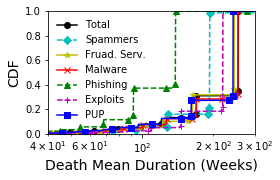

In [36]:
plt.figure(figsize=(4,2.6))

stat = 'Death'
cdf(week_l_d_s_r['Labelled'].transpose()[stat].values.tolist(),
    'k', '-', 'o', "Total")
cdf(week_l_d_s_r['Spammers'].transpose()[stat].values.tolist(),
    'c', '--', 'D', "Spammers")
cdf(week_l_d_s_r['Fraudlent Services'].transpose()[stat].values.tolist(),
    'y', '-', '*', "Fruad. Serv.")
cdf(week_l_d_s_r['Malware'].transpose()[stat].values.tolist(),
    'r', '-', 'x', "Malware")
cdf(week_l_d_s_r['Phishing'].transpose()[stat].values.tolist(),
    'g', '--', '^', "Phishing")
cdf(week_l_d_s_r['Exploits'].transpose()[stat].values.tolist(),
    'm', '--', '+', "Exploits")
cdf(week_l_d_s_r['Unwanted Programs'].transpose()[stat].values.tolist(),
    'b', '-', 's', "PUP")

plt.ylabel("CDF", fontsize=14)
plt.xlabel("Death Mean Duration (Weeks)", fontsize=14)
plt.legend(loc='upper left', fontsize=10, frameon=False)
plt.xscale('log')
plt.xlim(40, 300)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig("./figures/churn_attk_death_weekly.pdf")
plt.show()


## Rate of Arrival Plot

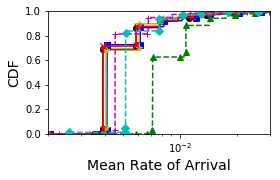

In [37]:
plt.figure(figsize=(4, 2.6))

stat = 'Reciprocal Mean Duration'
cdf(week_l_d_s_r['Labelled'].transpose()[stat].values.tolist(),
    'k', '-', 'o', "Total")
cdf(week_l_d_s_r['Unwanted Programs'].transpose()[stat].values.tolist(),
    'b', '-', 's', "PUP")
cdf(week_l_d_s_r['Fraudlent Services'].transpose()[stat].values.tolist(),
    'y', '-', '*', "Fruad. Serv.")
cdf(week_l_d_s_r['Malware'].transpose()[stat].values.tolist(),
    'r', '-', 'x', "Malware")
cdf(week_l_d_s_r['Exploits'].transpose()[stat].values.tolist(),
    'm', '--', '+', "Exploits")
cdf(week_l_d_s_r['Phishing'].transpose()[stat].values.tolist(),
    'g', '--', '^', "Phishing")
cdf(week_l_d_s_r['Spammers'].transpose()[stat].values.tolist(),
    'c', '--', 'D', "Spammers")

plt.ylabel("CDF", fontsize=14)
plt.xlabel("Mean Rate of Arrival", fontsize=14)
#plt.legend(loc='lower right', fontsize=10, frameon=False)
plt.xscale('log')
plt.xlim(0.002, 0.03)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig("./figures/churn_attk_roa_weekly.pdf")
plt.show()


## Severity Plot

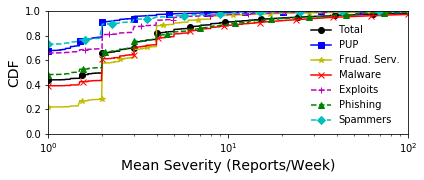

In [38]:
plt.figure(figsize=(6, 2.6))

stat = 'Severity'
cdf(week_l_d_s_r['Labelled'].transpose()[stat].values.tolist(),
    'k', '-', 'o', "Total")
cdf(week_l_d_s_r['Unwanted Programs'].transpose()[stat].values.tolist(),
    'b', '-', 's', "PUP")
cdf(week_l_d_s_r['Fraudlent Services'].transpose()[stat].values.tolist(),
    'y', '-', '*', "Fruad. Serv.")
cdf(week_l_d_s_r['Malware'].transpose()[stat].values.tolist(),
    'r', '-', 'x', "Malware")
cdf(week_l_d_s_r['Exploits'].transpose()[stat].values.tolist(),
    'm', '--', '+', "Exploits")
cdf(week_l_d_s_r['Phishing'].transpose()[stat].values.tolist(),
    'g', '--', '^', "Phishing")
cdf(week_l_d_s_r['Spammers'].transpose()[stat].values.tolist(),
    'c', '--', 'D', "Spammers")

plt.ylabel("CDF", fontsize=14)
plt.xlabel("Mean Severity (Reports/Week)", fontsize=14)
plt.legend(loc='lower right', fontsize=10, frameon=False)
plt.xscale('log')
plt.xlim(1, 100)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig("./figures/churn_attk_severity_weekly.pdf")
plt.show()

# Top IPs

## Top Lifetime (Persistent)

In [39]:
temp = week_l_d_s_r['Labelled'].transpose()
temp.sort_values('Life', ascending=False).head(10)

,Life,Death,Life_S,Death_S,Severity,Number of Lives,Number of Deaths,Reciprocal Mean Duration
209.85.200.132,62.000000,224.500000,4426.000000,0.0,71.387097,1.0,2.0,0.003490
74.125.201.132,51.666667,89.000000,1673.333333,0.0,28.941931,3.0,4.0,0.007109
209.85.234.132,48.000000,231.500000,4040.000000,0.0,84.166667,1.0,2.0,0.003578
74.125.70.132,38.000000,71.800000,1284.750000,0.0,28.085795,4.0,5.0,0.009107
74.125.202.132,37.333333,99.750000,1715.000000,0.0,29.696312,3.0,4.0,0.007295
141.8.225.244,37.000000,145.666667,2900.500000,0.0,40.226027,2.0,3.0,0.005474
74.125.129.132,32.000000,149.000000,2208.500000,0.0,36.531746,2.0,3.0,0.005525
209.85.145.132,30.500000,150.000000,1808.000000,0.0,37.983333,2.0,3.0,0.005540
74.125.207.132,28.500000,79.400000,1053.000000,0.0,33.305791,4.0,5.0,0.009268
209.85.146.132,27.000000,242.000000,3109.000000,0.0,115.148148,1.0,2.0,0.003717


## Lowest Deathtime (Resilient)

In [41]:
temp = week_l_d_s_r['Labelled'].transpose()
temp.sort_values('Death', ascending=True).head(10)

,Life,Death,Life_S,Death_S,Severity,Number of Lives,Number of Deaths,Reciprocal Mean Duration
103.224.212.222,2.711111,2.966667,109.911111,0.0,4.576658,90.0,90.0,0.176125
69.172.201.153,2.365591,3.095745,82.150538,0.0,4.639107,93.0,94.0,0.183105
204.11.56.48,3.521127,3.676056,299.323944,0.0,4.524940,71.0,71.0,0.138943
213.186.33.19,2.776316,3.896104,19.723684,0.0,5.460777,76.0,77.0,0.149871
208.73.211.70,1.939759,4.166667,59.096386,0.0,5.426148,83.0,84.0,0.163762
72.52.4.119,3.531250,4.384615,122.921875,0.0,8.754809,64.0,65.0,0.126329
72.52.4.120,3.125000,4.859375,33.093750,0.0,4.956702,64.0,64.0,0.125245
213.186.33.87,2.041096,4.891892,12.136986,0.0,4.001533,73.0,74.0,0.144238
185.53.179.8,2.656716,4.897059,89.671642,0.0,4.996464,67.0,68.0,0.132384
213.186.33.2,1.891892,4.946667,9.905405,0.0,4.683559,74.0,75.0,0.146230


## Top Rate of Arrival (Recurrent)

In [42]:
temp = week_l_d_s_r['Labelled'].transpose()
temp.sort_values('Reciprocal Mean Duration', ascending=False).head(10)

,Life,Death,Life_S,Death_S,Severity,Number of Lives,Number of Deaths,Reciprocal Mean Duration
69.172.201.153,2.365591,3.095745,82.150538,0.0,4.639107,93.0,94.0,0.183105
103.224.212.222,2.711111,2.966667,109.911111,0.0,4.576658,90.0,90.0,0.176125
208.73.211.70,1.939759,4.166667,59.096386,0.0,5.426148,83.0,84.0,0.163762
213.186.33.19,2.776316,3.896104,19.723684,0.0,5.460777,76.0,77.0,0.149871
213.186.33.2,1.891892,4.946667,9.905405,0.0,4.683559,74.0,75.0,0.146230
213.186.33.87,2.041096,4.891892,12.136986,0.0,4.001533,73.0,74.0,0.144238
8.5.1.51,1.750000,5.273973,11.430556,0.0,6.433796,72.0,73.0,0.142370
195.110.124.133,1.873239,5.250000,12.380282,0.0,4.482003,71.0,72.0,0.140386
204.11.56.48,3.521127,3.676056,299.323944,0.0,4.524940,71.0,71.0,0.138943
54.85.127.70,1.794118,5.637681,43.220588,0.0,8.778042,68.0,69.0,0.134557


## Highest Severity (reports per week)

In [76]:
temp = week_l_d_s_r['Labelled'].transpose()
temp.sort_values('Severity', ascending=False).head(10)

,Life,Death,Life_S,Death_S,Severity,Number of Lives,Number of Deaths,Reciprocal Mean Duration
52.85.131.44,1.0,255.0,34721.0,0.0,34721.0,1.0,2.0,0.003906
52.85.131.61,1.0,255.0,34544.0,0.0,34544.0,1.0,2.0,0.003906
54.192.195.113,1.0,255.0,34363.0,0.0,34363.0,1.0,2.0,0.003906
52.85.131.57,1.0,255.0,34325.0,0.0,34325.0,1.0,2.0,0.003906
52.84.125.57,1.0,255.0,34319.0,0.0,34319.0,1.0,2.0,0.003906
52.85.131.191,1.0,255.0,34305.0,0.0,34305.0,1.0,2.0,0.003906
52.85.131.219,1.0,255.0,34305.0,0.0,34305.0,1.0,2.0,0.003906
52.85.131.60,1.0,255.0,34282.0,0.0,34282.0,1.0,2.0,0.003906
52.85.131.198,1.0,255.0,34275.0,0.0,34275.0,1.0,2.0,0.003906
54.192.195.52,1.0,255.0,34262.0,0.0,34262.0,1.0,2.0,0.003906


# Additional Analysis

## Average Severity between types of mal-activity

In [62]:
for attack in week_l_d_s_r:
    print(attack)
    print(week_l_d_s_r[attack].transpose()['Severity'].mean())

Spammers
1.88772263189
Malware
30.8419471574
Exploits
2.70350029585
Phishing
9.32978466214
Fraudlent Services
5.63429493051
Unwanted Programs
2.07942498514
Labelled
19.0578201237


In [72]:
proportions = {
    'Malware':90.9,
    'Phishing':4.74,
    'Exploits':0.42,
    'Fraudlent Services':2.21,
    'Unwanted Programs':1.73,
    'Spammers':0.01,
    'Unlabelled':6,
    'Labelled':100
}
for attack in week_l_d_s_r:
    print(attack)
    print(week_l_d_s_r[attack].transpose()['Severity'].mean()/proportions[attack])

Spammers
188.772263189
Malware
0.339295348266
Exploits
6.4369054663
Phishing
1.96830900045
Fraudlent Services
2.54945471969
Unwanted Programs
1.20197976019
Labelled
0.190578201237


## Proportion of (average) 1 Week offenders

In [65]:
# Ips with an average lifetime of 1
temp = week_l_d_s_r['Labelled'].transpose()['Life']

onewk = len(temp[temp==1])
all_hosts = len(temp)

print(1.0*onewk/all_hosts)

0.864268353437


In [48]:
# IPs with lifetimes greater than 2 weeks
temp = week_l_d_s_r['Labelled'].transpose()['Life']

onewk = len(temp[temp>2])
all_hosts = len(temp)

print(1.0 - 1.0*onewk/all_hosts)

0.976819492459


In [73]:
# IP average activity cycle
temp = week_l_d_s_r['Labelled'].transpose()['Reciprocal Mean Duration']

print(1/temp.mean())

185.330345723


In [74]:
# Shortest mal-activity cycle
temp = week_l_d_s_r['Labelled'].transpose()['Reciprocal Mean Duration']

print(1/temp.max())

5.461336078700526


In [61]:
# Number of hosts with >10K severity (reports per week)
temp = week_l_d_s_r['Labelled'].transpose()['Severity']

found_hosts = len(temp[temp > 10000])
all_hosts = len(temp)

print(found_hosts)
print(all_hosts)
print(1.0*found_hosts/all_hosts)

200
662410
0.000301927809061
